# Simple Linear Regression
# Estimating the amount paid to the taxi driver

In [52]:
%matplotlib inline
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# suppress Pandas warnings entirely.
pd.set_option('mode.chained_assignment',None)
# Turn off warnings completely for the Notebook
warnings.filterwarnings('ignore')

In [53]:
df_taxi = pd.DataFrame({
    'Kilometres': [1, 2, 3, 4, 5],
    'Paid (incl. tips)': [8, 10, 14, 15, 20],
})

df_taxi

,Kilometres,Paid (incl. tips)
0,1,8
1,2,10
2,3,14
3,4,15
4,5,20


<ipython-input-3-f9fa16ed7474>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


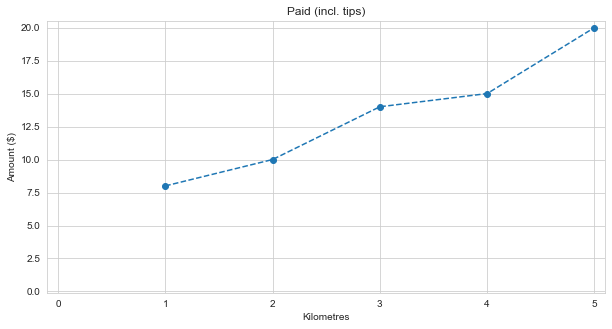

In [3]:
fig, axs = plt.subplots(figsize=(10, 5))

df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', grid=True
)

axs.set_xlabel('Kilometres')
axs.set_ylabel('Amount ($)')
axs.set_xlim((-0.1,5.1))
axs.set_ylim((-0.1,20.5))

fig.show()

## Running Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

# Make predictions
df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

# Regression intercept & coefficients
print('Amount Paid = {:.1f} + {:.1f} * Distance'.format(reg.intercept_, reg.coef_[0]))

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line


<ipython-input-5-7294151bb64e>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


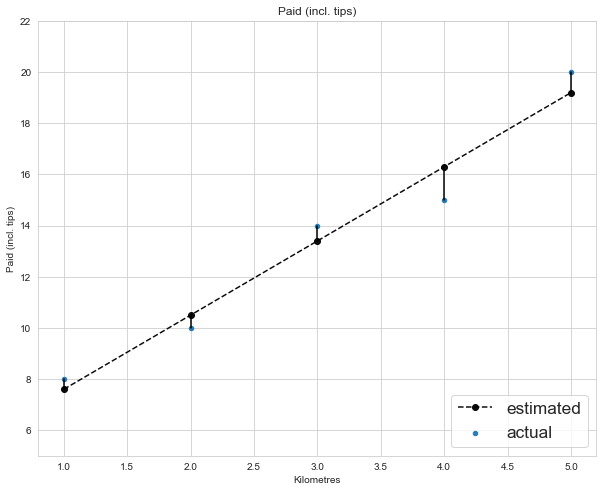

In [5]:
fig, ax = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

df_taxi.tail(5).plot(
    label='actual', kind='scatter', x='Kilometres', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

df_taxi.tail(5).set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line',
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in df_taxi.tail(5)[
    ['Kilometres', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

fig.show()

<ipython-input-6-7889ec90d918>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


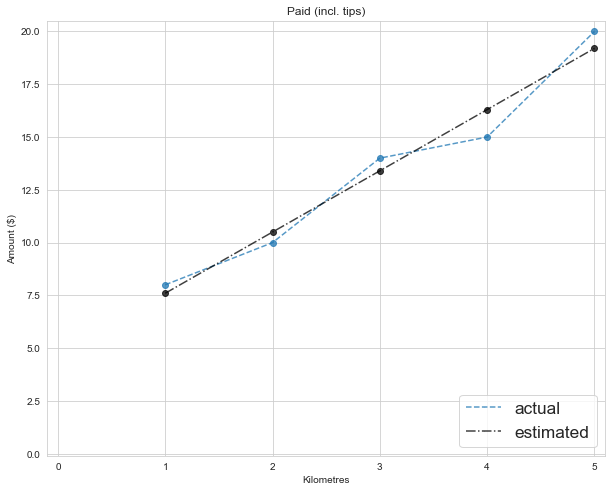

In [6]:
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    label='actual', kind='line',
    marker='o', linestyle='--', alpha=0.75
)

df_taxi.set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line',
    marker='o', linestyle='-.', color='k', alpha=0.75
)

axs.set_xlabel('Kilometres')
axs.set_ylabel('Amount ($)')

axs.set_xlim((-0.1,5.1))
axs.set_ylim((-0.1,20.5))

axs.legend(markerscale=0.01, loc='lower right', fontsize='xx-large')

fig.show()

## Predicting house prices in California

In [7]:
from sklearn.datasets import fetch_california_housing

# Load the data
california = fetch_california_housing()
df_dataset = pd.DataFrame(
    california.data,
    columns=california.feature_names,
)
df_dataset['target'] = california.target

## Data Exploration

In [8]:
df_dataset.shape

(20640, 9)

In [9]:
# check null values
df_dataset.isnull().sum().sum()

0

In [10]:
# Checking the target's distribution
df_dataset['target'].describe(percentiles=[0.9, 0.95, 0.99])

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
50%          1.797000
90%          3.766000
95%          4.898100
99%          5.000010
max          5.000010
Name: target, dtype: float64

In [11]:
# Understanding the loaded features
df_dataset[california.feature_names].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


<ipython-input-12-31a99fee967e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


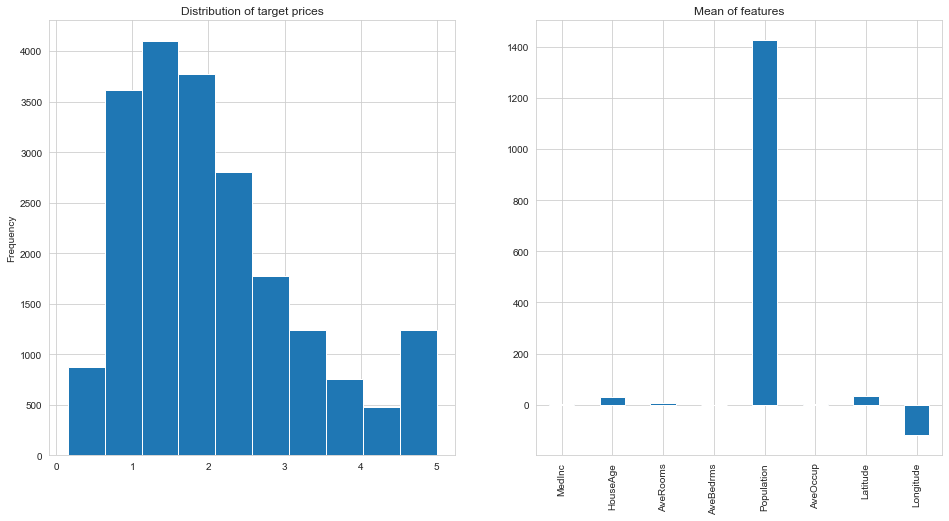

In [12]:
# Understand the distribution of the target
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df_dataset['target'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])
df_dataset[california.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])

fig.show()

<ipython-input-13-193437f6b4bc>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


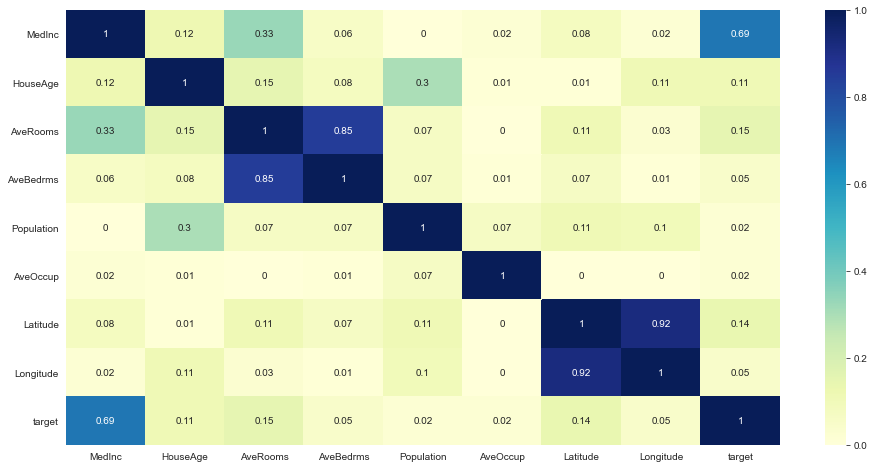

In [13]:
# Correlation Plot
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(data=df_dataset.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax)
fig.show()

## Splitting the Dataset

In [14]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[california.feature_names]
x_test  = df_test[california.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [15]:
df_dataset['target'].count(), df_train['target'].count(), df_test['target'].count()

(20640, 12384, 8256)

In [16]:
df_dataset['target'].mean(), df_train['target'].mean(), df_test['target'].mean()

(2.068558169089147, 2.0686824733527134, 2.0683717126937986)

In [17]:
df_dataset['target'].median(), df_train['target'].median(), df_test['target'].median()

(1.797, 1.8005, 1.792)

## Baseline Regressor

In [18]:
# Baseline Regressor
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

In [19]:
y_test_baselin[:5]

array([2.06868247, 2.06868247, 2.06868247, 2.06868247, 2.06868247])

## Linear Regressor

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

## Comparing our Linear Regression to the baseline model

In [21]:
# Calculate R2, MAE, MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = 0.60 vs Baseline = -0.00
MAE Regressor = 0.54 vs Baseline = 0.91
MSE Regressor = 0.53 vs Baseline = 1.33


In [22]:
# Check importance for each feature
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
AveBedrms,0.606931,0.606931
MedInc,0.436438,0.436438
Longitude,-0.434423,0.434423
Latitude,-0.419640,0.419640
AveRooms,-0.103793,0.103793
HouseAge,0.009715,0.009715
AveOccup,-0.005813,0.005813
Population,-0.000004,0.000004


<ipython-input-23-0aa2a6256da2>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


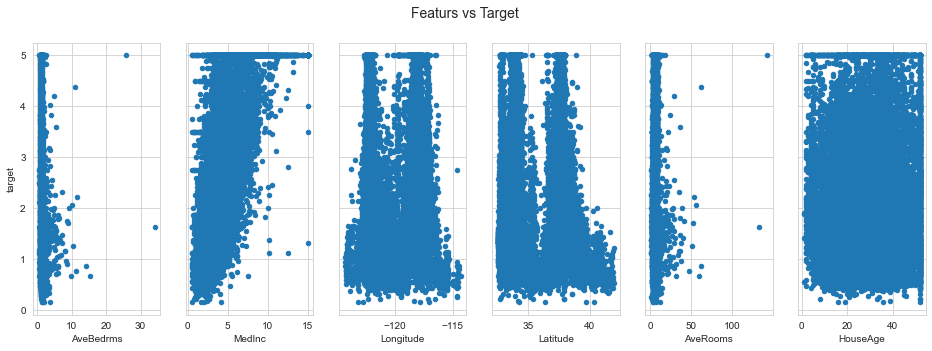

In [23]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

## Features Scaling

In [24]:
# Features Scaling & Train the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)
y_test_pred = reg.predict(x_test_scaled)

In [25]:
# Calculate R2, MAE, MSE - After Features Scaling
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = 0.60 vs Baseline = -0.00
MAE Regressor = 0.54 vs Baseline = 0.91
MSE Regressor = 0.53 vs Baseline = 1.33


In [26]:
# Check importance for each feature - After Features Scaling
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
AveBedrms,20.473796,20.473796
AveRooms,-14.625386,14.625386
MedInc,6.328435,6.328435
Longitude,-4.361609,4.361609
Latitude,-3.948810,3.948810
AveOccup,-2.916396,2.916396
HouseAge,0.495487,0.495487
Population,-0.148745,0.148745


<ipython-input-27-0aa2a6256da2>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


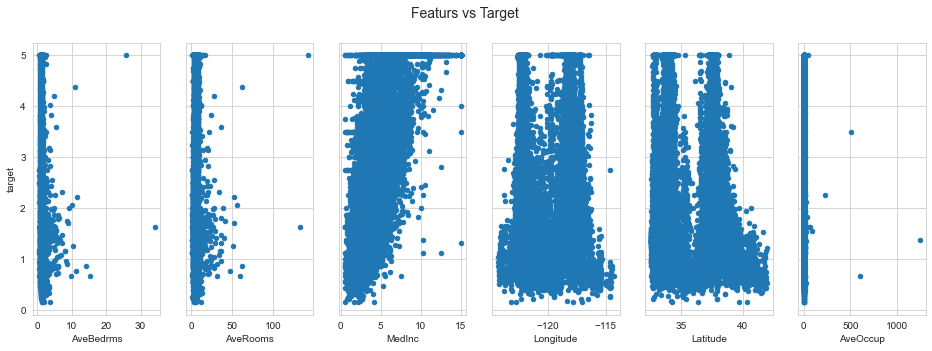

In [27]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

## Features Transformation

In [28]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

# degree=3 to get both the quadratic and cubic feature transformation
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [29]:
x_train_poly

array([[ 1.00000000e+00,  6.87290000e+00,  8.00000000e+00, ...,
        -1.32822690e+05,  4.57683869e+05, -1.57709894e+06],
       [ 1.00000000e+00,  2.84380000e+00,  2.10000000e+01, ...,
        -1.79585897e+05,  5.70911850e+05, -1.81495511e+06],
       [ 1.00000000e+00,  2.60870000e+00,  2.10000000e+01, ...,
        -1.67895062e+05,  5.45377250e+05, -1.77156100e+06],
       ...,
       [ 1.00000000e+00,  1.91190000e+00,  4.30000000e+01, ...,
        -1.36455876e+05,  4.75004633e+05, -1.65349714e+06],
       [ 1.00000000e+00,  5.16470000e+00,  5.00000000e+00, ...,
        -1.36149788e+05,  4.69964750e+05, -1.62223438e+06],
       [ 1.00000000e+00,  6.12800000e+00,  2.60000000e+01, ...,
        -1.34352505e+05,  4.69955026e+05, -1.64386758e+06]])

In [30]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names_out()
]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [31]:
x_train_poly

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,AveOccup^3,AveOccup^2 Latitude,AveOccup^2 Longitude,AveOccup Latitude^2,AveOccup Latitude Longitude,AveOccup Longitude^2,Latitude^3,Latitude^2 Longitude,Latitude Longitude^2,Longitude^3
0,1.0,6.8729,8.0,14.706731,2.403846,612.0,2.942308,33.78,-116.40,47.236754,...,25.472071,292.439357,-1007.695118,3357.433177,-11569.130308,39865.209231,38545.966152,-132822.689760,457683.868800,-1.577099e+06
1,1.0,2.8438,21.0,4.714953,1.051402,2018.0,3.143302,38.37,-121.98,8.087198,...,31.056921,379.108976,-1205.204922,4627.748324,-14711.825400,46769.571600,56490.497253,-179585.896662,570911.849748,-1.814955e+06
2,1.0,2.6087,21.0,5.193029,1.042895,1002.0,2.686327,37.25,-121.00,6.805316,...,19.385485,268.809156,-873.178733,3727.446716,-12107.947721,39330.514745,51686.703125,-167895.062500,545377.250000,-1.771561e+06
3,1.0,2.0192,22.0,3.528752,1.158485,3350.0,4.698457,34.18,-118.45,4.077169,...,103.720794,754.540599,-2614.843008,5489.077896,-19022.272581,65921.245968,39931.550632,-138381.865780,479559.157450,-1.661901e+06
4,1.0,4.1165,26.0,4.937500,0.998047,2677.0,5.228516,37.32,-121.81,16.945572,...,142.933896,1020.230859,-3329.965727,7282.184541,-23768.566423,77579.021328,51978.639168,-169654.824144,553742.072052,-1.807377e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,1.0,4.0114,42.0,6.687243,1.049383,578.0,2.378601,38.12,-122.24,16.091330,...,13.457509,215.673120,-691.602367,3456.426680,-11083.777475,35542.522522,55393.483328,-177631.149056,569612.582912,-1.826586e+06
12380,1.0,4.1449,37.0,5.769231,1.053254,1183.0,3.500000,33.93,-118.09,17.180196,...,42.875000,415.642500,-1446.602500,4029.357150,-14023.777950,48808.368350,39061.739457,-135950.510241,473162.268033,-1.646794e+06
12381,1.0,1.9119,43.0,3.311069,1.020992,2288.0,4.366412,33.97,-118.25,3.655362,...,83.248075,647.656924,-2254.501952,5038.668968,-17539.670458,61055.814885,39200.051773,-136455.876425,475004.633125,-1.653497e+06
12382,1.0,5.1647,5.0,5.942943,0.998498,2456.0,3.687688,34.04,-117.50,26.674126,...,50.149014,462.911338,-1597.887257,4273.003378,-14749.644444,50913.138138,39442.883264,-136149.788000,469964.750000,-1.622234e+06


In [32]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [33]:
# Calculate R2, MAE, MSE - With derived Features
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -23525.196 vs Baseline = -0.0
MAE Regressor = 3.021 vs Baseline = 0.9
MSE Regressor = 31300.964 vs Baseline = 1.3


In [34]:
x_train_poly.shape

(12384, 165)

In [35]:
x_train_poly.corr()

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,AveOccup^3,AveOccup^2 Latitude,AveOccup^2 Longitude,AveOccup Latitude^2,AveOccup Latitude Longitude,AveOccup Longitude^2,Latitude^3,Latitude^2 Longitude,Latitude Longitude^2,Longitude^3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedInc,NaN,1.000000,-0.109248,0.307372,-0.061429,-0.006092,-0.005585,-0.082014,-0.014660,0.942571,...,0.002855,0.003928,-0.003760,-0.009058,0.006823,-0.004738,-0.087271,0.073544,-0.048825,-0.014489
HouseAge,NaN,-0.109248,1.000000,-0.133893,-0.066367,-0.295994,0.013869,0.006007,-0.099871,-0.071432,...,0.013798,0.015207,-0.014963,0.013794,-0.014715,0.015484,0.000593,-0.014672,0.039460,-0.099284
AveRooms,NaN,0.307372,-0.133893,1.000000,0.861771,-0.072565,0.008178,0.096826,-0.025090,0.278269,...,0.013553,0.014522,-0.014377,0.015434,-0.012215,0.009091,0.098155,-0.089263,0.072207,-0.025508
AveBedrms,NaN,-0.061429,-0.066367,0.861771,1.000000,-0.060447,-0.002468,0.062172,0.013318,-0.047324,...,0.004385,0.005115,-0.004983,0.002156,0.000161,-0.002355,0.064593,-0.054377,0.035653,0.012900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AveOccup Longitude^2,NaN,-0.004738,0.015484,0.009091,-0.002355,0.085600,0.999761,-0.005266,0.002012,-0.002790,...,0.916094,0.954370,-0.950667,0.996274,-0.999107,1.000000,-0.006348,0.005679,-0.004657,0.002352
Latitude^3,NaN,-0.087271,0.000593,0.098155,0.064593,-0.106137,-0.023767,0.998791,-0.917352,-0.073280,...,-0.000586,0.000731,-0.000325,0.043804,-0.018425,-0.006348,1.000000,-0.998267,0.987355,-0.917705
Latitude^2 Longitude,NaN,0.073544,-0.014672,-0.089263,-0.054377,0.105217,0.023498,-0.998877,0.938657,0.062445,...,-0.000240,-0.001440,0.001051,-0.044020,0.018892,0.005679,-0.998267,1.000000,-0.994925,0.938936
Latitude Longitude^2,NaN,-0.048825,0.039460,0.072207,0.035653,-0.103323,-0.023036,0.990460,-0.968449,-0.042810,...,0.001753,0.002727,-0.002373,0.043813,-0.019337,-0.004657,0.987355,-0.994925,1.000000,-0.968644


In [36]:
# Check importance for each feature - After Features transformation
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance[df_feature_importance['Coeff'].abs() > 0]

,Coeff,ABS(Coeff)
Features,,
Latitude,1.632759e+02,1.632759e+02
HouseAge,8.028107e+01,8.028107e+01
AveRooms,7.201266e+01,7.201266e+01
Longitude,7.103915e+01,7.103915e+01
AveOccup,-2.751198e+01,2.751198e+01
...,...,...
Population^2 Longitude,2.067452e-09,2.067452e-09
Population^2 Latitude,1.036874e-09,1.036874e-09
HouseAge Population^2,-9.831354e-10,9.831354e-10


## Training the lasso regressor

In [37]:
# Training the lasso regressor
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

/Users/dmmil/.pyenv/versions/env3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.988e+03, tolerance: 6.950e+00
  model = cd_fast.enet_coordinate_descent(


In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -137.848 vs Baseline = -0.0
MAE Regressor = 0.659 vs Baseline = 0.9
MSE Regressor = 184.734 vs Baseline = 1.3


In [39]:
# Training the Ridge regressor
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=False, solver='svd', alpha=1)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -2043.034 vs Baseline = -0.0
MAE Regressor = 1.237 vs Baseline = 0.9
MSE Regressor = 2719.532 vs Baseline = 1.3


## Lasso and Cross validation

In [41]:
# lasso and Cross validation
import numpy as np
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 50)

reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5, n_jobs=5)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning)

with warnings.catch_warnings(record=True) as w:
    reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

In [42]:
f'{alphas.min():.6f}, {alphas.max():,.0f}'

'0.000001, 1,000,000'

In [43]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 3556.4803062231213


<ipython-input-44-2b365b766d56>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


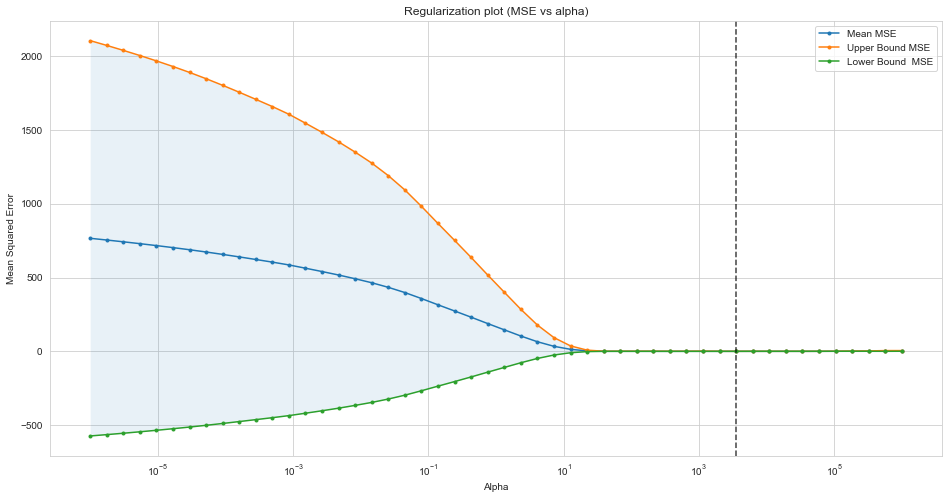

In [44]:
# Regularization Plots
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

n_folds = reg.mse_path_.shape[1]

mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
mse_std_error = mse_std / np.sqrt(n_folds)

pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound  MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[['Mean MSE', 'Upper Bound MSE', 'Lower Bound  MSE']].plot(
    title='Regularization plot (MSE vs alpha)', marker='.', logx=True, ax=ax
)

plt.fill_between(reg.alphas_, mse_mean + 1.96 * mse_std_error, mse_mean - 1.96 * mse_std_error, alpha=0.1)

ax.axvline(reg.alpha_,  linestyle='--', color='k', alpha=0.75,)

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

fig.show()

In [45]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]

# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

Text(0, 0.5, 'Mean Squared Error')

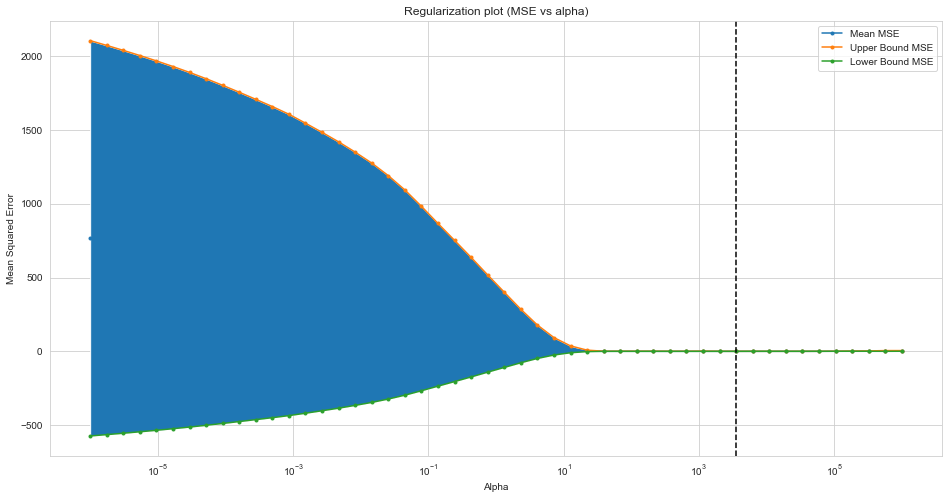

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[
    ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)',
    marker='.', logx=True, ax=ax
)

# Color the confidence interval
plt.fill_between(
    reg.alphas_,
    mse_mean + 1.96 * mse_std_error,
    mse_mean - 1.96 * mse_std_error,
)

# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -2.999 vs Baseline = -0.0
MAE Regressor = 0.624 vs Baseline = 0.9
MSE Regressor = 5.320 vs Baseline = 1.3


## Regression Ranges

In [48]:
df_noisy = pd.DataFrame(
    {
        'x': np.random.randint(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)

df_noisy['y'] = df_noisy['x'] + df_noisy['noise']

<AxesSubplot:xlabel='x', ylabel='y'>

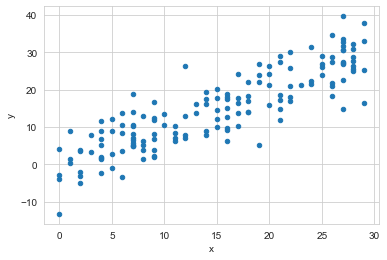

In [49]:
df_noisy.plot(
    kind='scatter', x='x', y='y'
)

In [50]:
# Train two regressors on the same data — LinearRegression and BayesianRidge.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])


br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)

<ipython-input-51-74e132ac047b>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


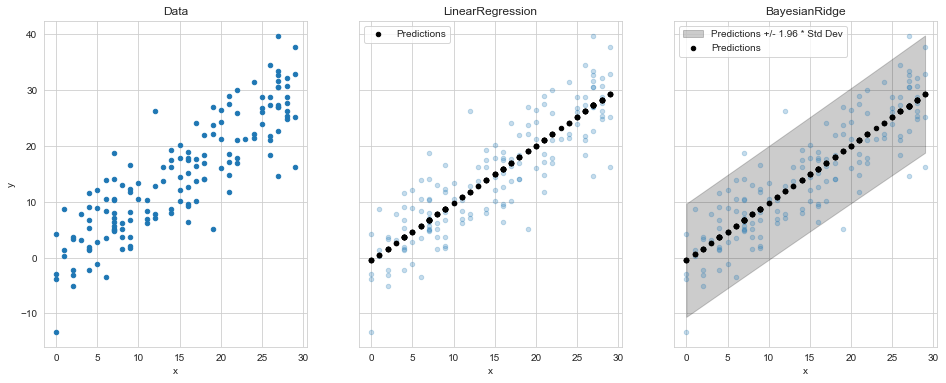

In [51]:
# Plots for the two models and their predictions
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)

axs[2].fill_between(
    df_noisy.sort_values('x')['x'],
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'],
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
    ax=axs[1], marker='o', color='k', label='Predictions'
)

df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
    ax=axs[2], marker='o', color='k', label='Predictions'
)

axs[1].legend()
axs[2].legend()

fig.show()